In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# 데이터 확인

In [2]:
df = pd.read_csv('./data/chapter28_game.csv')
df.shape

(90189, 5)

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# 데이터 EDA & 전처리

### 데이터 확인

In [4]:
df['version'].unique()

array(['gate_30', 'gate_40'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [6]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


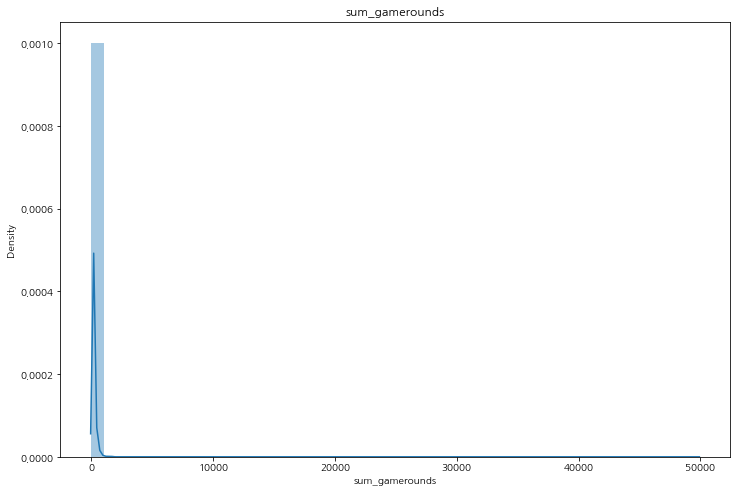

In [7]:
plt.figure(figsize=(12, 8))
sns.distplot(df['sum_gamerounds'])
plt.title('sum_gamerounds')
plt.show()

In [8]:
df[df['sum_gamerounds'] > 2000]

,userid,version,sum_gamerounds,retention_1,retention_7
6536,725080,gate_40,2015,True,True
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
36933,4090246,gate_40,2124,True,True
43671,4832608,gate_30,2438,True,True
46344,5133952,gate_30,2251,True,True
48188,5346171,gate_40,2294,True,True
57702,6390605,gate_30,49854,False,True
87007,9640085,gate_30,2156,True,True
88328,9791599,gate_40,2063,True,True


In [9]:
df[df['sum_gamerounds'] < 1000].describe()

,userid,sum_gamerounds
count,9.007100e+04,90071.000000
mean,4.998348e+06,49.655316
std,2.883295e+06,90.832957
min,1.160000e+02,0.000000
25%,2.511803e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496434e+06,51.000000
max,9.999861e+06,997.000000


In [10]:
# 결측치는 없다
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [11]:
df.skew()

userid             -0.001290
sum_gamerounds    185.436313
retention_1         0.220493
retention_7         1.613430
dtype: float64

In [12]:
df['retention_1'].value_counts()

False    50036
True     40153
Name: retention_1, dtype: int64

In [13]:
df['retention_7'].value_counts()

False    73408
True     16781
Name: retention_7, dtype: int64

- version은 30, 40 두 가지

In [14]:
df['version'].unique()

array(['gate_30', 'gate_40'], dtype=object)

### data 분포

In [15]:
# 총 User 수 (90,188명)
df['userid'].count()

90189

In [16]:
# Version별 User id
print("gate_30 :", len(df[df['version'] == 'gate_30']))
print('gate_40 :', len(df[df['version'] == 'gate_40']))

gate_30 : 44700
gate_40 : 45489


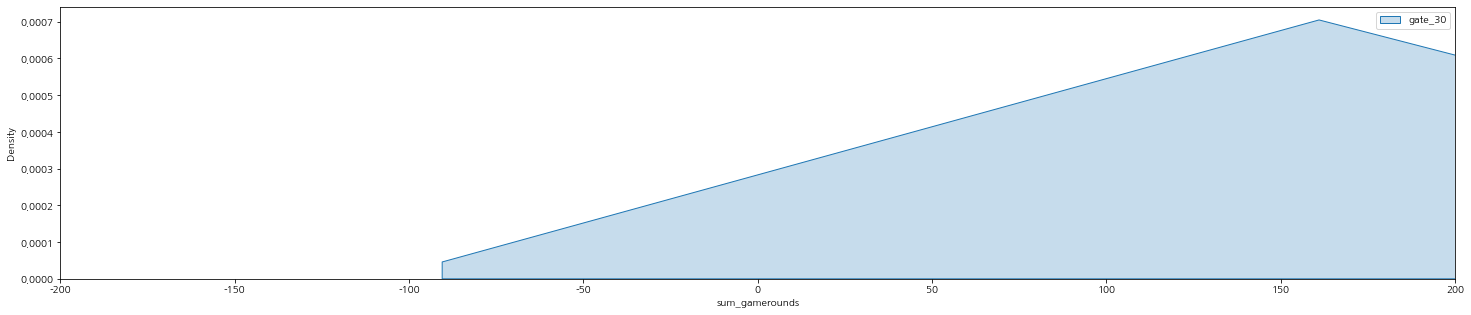

In [17]:
sns.kdeplot(df[df['version']=='gate_30']['sum_gamerounds'], shade=True, label='gate_30')
plt.gcf().set_size_inches(25, 5)
plt.legend()
plt.xlim(-200, 200)
plt.show()

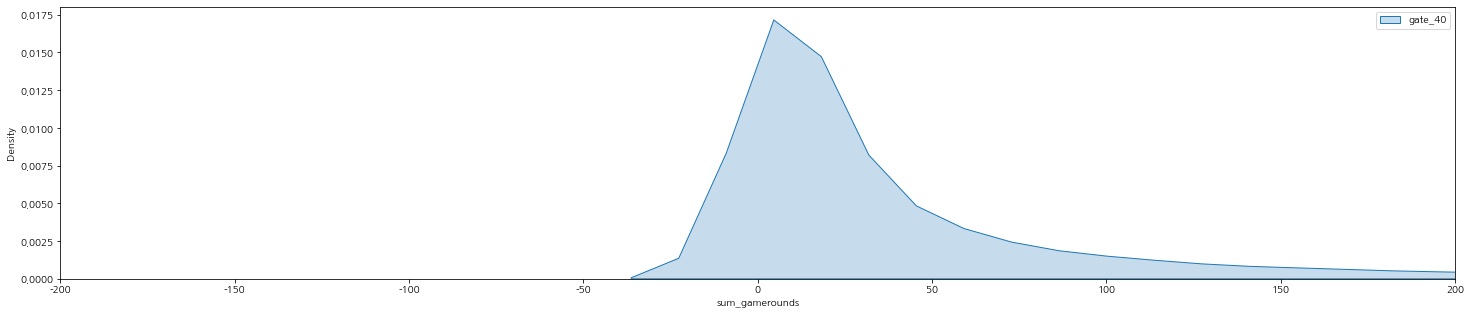

In [18]:
sns.kdeplot(df[df['version']=='gate_40']['sum_gamerounds'], shade=True, label='gate_40')
plt.gcf().set_size_inches(25, 5)
plt.legend()
plt.xlim(-200, 200)
plt.show()

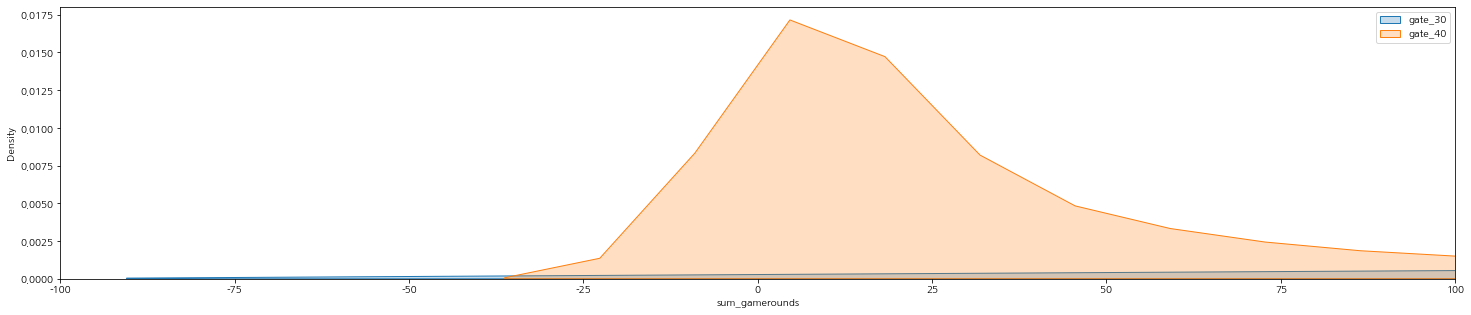

In [19]:
sns.kdeplot(df[df['version']=='gate_30']['sum_gamerounds'], shade=True, label='gate_30')
sns.kdeplot(df[df['version']=='gate_40']['sum_gamerounds'], shade=True, label='gate_40')
plt.gcf().set_size_inches(25, 5)
plt.legend()
plt.xlim(-100, 100)
plt.show()

In [20]:
# version별 게임횟수 평균 비교
df[df['version']=='gate_30']['sum_gamerounds'].mean(), df[df['version']=='gate_40']['sum_gamerounds'].mean()

(52.45626398210291, 51.29877552814966)

In [21]:
# version별 리텐션율 평균 비교
df[df['version']=='gate_30']['retention_1'].value_counts()

False    24666
True     20034
Name: retention_1, dtype: int64

In [22]:
# version별 리텐션율 평균 비교
df[df['version']=='gate_40']['retention_1'].value_counts()

False    25370
True     20119
Name: retention_1, dtype: int64

In [23]:
# version별 리텐션율 평균 비교
df[df['version']=='gate_30']['retention_7'].value_counts()

False    36198
True      8502
Name: retention_7, dtype: int64

In [24]:
# version별 리텐션율 평균 비교
df[df['version']=='gate_40']['retention_7'].value_counts()

False    37210
True      8279
Name: retention_7, dtype: int64

In [25]:
8279 / (20119 + 25370)

0.18200004396667327

### retention 타입 변경

In [34]:
# retention 값 변경
df['retention_1'] = np.where(df['retention_1'] == True, 1, 0)
df['retention_7'] = np.where(df['retention_7'] == True, 1, 0)
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


### 변수 확인

In [35]:
# 연속형 변수는 평균, 범주형 변수는 반응률
df.groupby('version')[['sum_gamerounds', 'retention_1', 'retention_7']].agg(['mean', 'count', 'sum'])

sum_gamerounds                 retention_1               retention_7  \
                  mean  count      sum        mean  count    sum        mean   
version                                                                        
gate_30      52.456264  44700  2344795    0.448188  44700  20034    0.190201   
gate_40      51.298776  45489  2333530    0.442283  45489  20119    0.182000   

                      
         count   sum  
version               
gate_30  44700  8502  
gate_40  45489  8279

In [36]:
# ▶ 연속형 변수는 평균, 범주형 변수는 반응률, reset_index로 multi index를 제거
df_pivot = pd.DataFrame(df.groupby('version')[['sum_gamerounds', 'retention_1', 'retention_7']].agg(['mean', 'count', 'sum']).reset_index())
df_pivot

version sum_gamerounds                 retention_1                \
                     mean  count      sum        mean  count    sum   
0  gate_30      52.456264  44700  2344795    0.448188  44700  20034   
1  gate_40      51.298776  45489  2333530    0.442283  45489  20119   

  retention_7               
         mean  count   sum  
0    0.190201  44700  8502  
1    0.182000  45489  8279

In [37]:
# Col 재정비 (1)
df_pivot.columns = ['version', 'sum_gamerounds_mean', 'sum_gamerounds_count', 'sum_gamerounds_sum',
                    'retention_1_mean', 'retention_1_count', 'retention_1_sum', 
                    'retention_7_mean', 'retention_7_count', 'retention_7_sum']
df_pivot            

,version,sum_gamerounds_mean,sum_gamerounds_count,sum_gamerounds_sum,retention_1_mean,retention_1_count,retention_1_sum,retention_7_mean,retention_7_count,retention_7_sum
0,gate_30,52.456264,44700,2344795,0.448188,44700,20034,0.190201,44700,8502
1,gate_40,51.298776,45489,2333530,0.442283,45489,20119,0.182000,45489,8279


In [38]:
# Col 재정비 (2)
df_pivot = df_pivot[['version', 'sum_gamerounds_mean', 'retention_1_count', 'retention_1_sum', 'retention_7_count', 'retention_7_sum']]
df_pivot

,version,sum_gamerounds_mean,retention_1_count,retention_1_sum,retention_7_count,retention_7_sum
0,gate_30,52.456264,44700,20034,44700,8502
1,gate_40,51.298776,45489,20119,45489,8279


In [39]:
# 반응률 계산
df_pivot['retention_1_ratio'] = df_pivot['retention_1_sum'] / df_pivot['retention_1_count']
df_pivot['retention_7_ratio'] = df_pivot['retention_7_sum'] / df_pivot['retention_7_count']
df_pivot

,version,sum_gamerounds_mean,retention_1_count,retention_1_sum,retention_7_count,retention_7_sum,retention_1_ratio,retention_7_ratio
0,gate_30,52.456264,44700,20034,44700,8502,0.448188,0.190201
1,gate_40,51.298776,45489,20119,45489,8279,0.442283,0.182000


In [40]:
df_pivot.columns

Index(['version', 'sum_gamerounds_mean', 'retention_1_count',
       'retention_1_sum', 'retention_7_count', 'retention_7_sum',
       'retention_1_ratio', 'retention_7_ratio'],
      dtype='object')

In [41]:
df_pivot[['version', 'sum_gamerounds_mean', 'retention_1_ratio', 'retention_7_ratio']]

,version,sum_gamerounds_mean,retention_1_ratio,retention_7_ratio
0,gate_30,52.456264,0.448188,0.190201
1,gate_40,51.298776,0.442283,0.182000


In [42]:
# diff 계산
print('sum_gamerounds_diff :',df_pivot['sum_gamerounds_mean'].iloc[0] - df_pivot['sum_gamerounds_mean'].iloc[1])
print('retention_1_diff :', df_pivot['retention_1_ratio'].iloc[0] - df_pivot['retention_1_ratio'].iloc[1])
print('retention_7_diff :', df_pivot['retention_7_ratio'].iloc[0] - df_pivot['retention_7_ratio'].iloc[1])

sum_gamerounds_diff : 1.157488453953249
retention_1_diff : 0.005905169787341458
retention_7_diff : 0.008201298315205913


## AB test 활용

#### Sum play game rounds T-test 

In [44]:
tstat, pvalue = stats.bartlett(df[df['version'] == 'gate_30']['sum_gamerounds'], df[df['version'] == 'gate_40']['sum_gamerounds'])
print("P-value:", round(pvalue,4))

P-value: 0.0


In [48]:
tstat, pvalue = stats.ttest_ind(df[df.version == 'gate_30'].sum_gamerounds, df[df.version == 'gate_40'].sum_gamerounds, equal_var=False)
print('tstat: ', tstat)
print("P-value:", round(pvalue,3))

tstat:  0.8854374331270672
P-value: 0.376


In [47]:
tstat

0.8854374331270672

#### Chi2 test